머신러닝(딥러닝) 입문

###Linear regression

###기존의 프로그램 방식


In [1]:
def celsius_to_fahrenheit(x):
    return x * 1.8 + 32

In [2]:
celsius_value = int(input('섭씨온도를 입력하세요'))
print('화씨온도로',celsius_to_fahrenheit(celsius_value))

섭씨온도를 입력하세요 23


화씨온도로 73.4


###머신러닝방식

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_C = np.array(range(0,100))
data_F = celsius_to_fahrenheit(data_C)
print(data_C)
print(data_F)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 32.   33.8  35.6  37.4  39.2  41.   42.8  44.6  46.4  48.2  50.   51.8
  53.6  55.4  57.2  59.   60.8  62.6  64.4  66.2  68.   69.8  71.6  73.4
  75.2  77.   78.8  80.6  82.4  84.2  86.   87.8  89.6  91.4  93.2  95.
  96.8  98.6 100.4 102.2 104.  105.8 107.6 109.4 111.2 113.  114.8 116.6
 118.4 120.2 122.  123.8 125.6 127.4 129.2 131.  132.8 134.6 136.4 138.2
 140.  141.8 143.6 145.4 147.2 149.  150.8 152.6 154.4 156.2 158.  159.8
 161.6 163.4 165.2 167.  168.8 170.6 172.4 174.2 176.  177.8 179.6 181.4
 183.2 185.  186.8 188.6 190.4 192.2 194.  195.8 197.6 199.4 201.2 203.
 204.8 206.6 208.4 210.2]


In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1))
model.compile(loss='mse',optimizer='rmsprop') #데이터 학습
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
scaled_data_C = data_C /100 #mse를 쓰기 때문에
scaled_data_F = data_F /100
print(scaled_data_C)
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76 

In [7]:
print(model.predict([0.01]))

1/1 [==============================] - 0s 103ms/step
[[-0.0167645]]


In [8]:
model.save('before_learning.h5')

C:\Users\PC\work\python\AI_intel_S2\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
fit_hist = model.fit(scaled_data_C,scaled_data_F,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.1526
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.1049
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 5.0671
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0349
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 5.0077
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.9789
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.9521
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.9256
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.9004
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.8734
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 4.8492
Epoch 12/1000
4/4 [==============================] - 0s 3ms/step - loss: 4.8214
Epoch 13/1000
4/4 [==============================

In [10]:
print(model.predict([0.01]))

1/1 [==============================] - 0s 40ms/step
[[0.3428752]]


In [11]:
model.save('after_learning.h5')

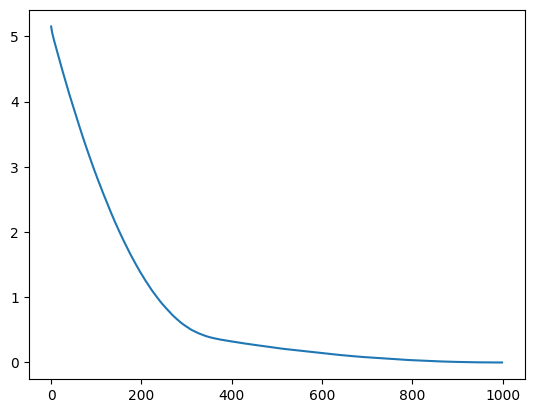

In [12]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [13]:
noise = np.array(np.random.normal(0, 0.05, 100))
print(noise)

[-0.00344184 -0.06763572  0.02646241 -0.0110402   0.0983424   0.02622045
  0.05448691 -0.02753913 -0.04105778  0.01134677  0.0550832   0.00910205
 -0.04494203  0.04517372  0.038343    0.063464    0.07018769 -0.01381992
 -0.01750947  0.03336061 -0.00458045 -0.02950574 -0.04954703 -0.02954791
  0.00909806 -0.05118503 -0.11653305  0.05391656 -0.0064438  -0.05364858
  0.04127996 -0.00017245 -0.00906319 -0.00064967  0.04773844 -0.01972181
  0.02043077  0.02464352 -0.00371499  0.06269361  0.05052041 -0.00908446
 -0.06066102  0.00065304 -0.1344859  -0.01581521 -0.03840335 -0.06473929
  0.00051028 -0.11259519 -0.02988892 -0.04075098 -0.00228336  0.02035456
 -0.00545256  0.07039237  0.05708426  0.01599727 -0.02249772  0.01103031
 -0.06289249 -0.01593512 -0.03856169 -0.06166615  0.06045076  0.03991461
  0.06416689 -0.06551471 -0.04052314  0.04229773 -0.05539217 -0.07486875
  0.00976558  0.04104464 -0.02223779 -0.0196189   0.02913862 -0.02561005
 -0.00352794  0.0637056   0.01132767 -0.06406857  0

In [14]:
noised_scaled_data_F = np.array([])
for data in scaled_data_F:
    noised_scaled_data_F = np.append(
        noised_scaled_data_F, np.random.normal(0,0.05,100)+data)
print(noised_scaled_data_F)
print(len(noised_scaled_data_F))

[0.28954971 0.27326101 0.35112086 ... 2.12117065 2.08414513 2.06204691]
10000


In [15]:
noised_scaled_data_C = []
for data in range(0,100):
    for i in range(0,100):
        noised_scaled_data_C.append(data)
noised_scaled_data_C = np.array(noised_scaled_data_C)
noised_scaled_data_C = noised_scaled_data_C /100
print(noised_scaled_data_C)
print(len(noised_scaled_data_C))

[0.   0.   0.   ... 0.99 0.99 0.99]
10000


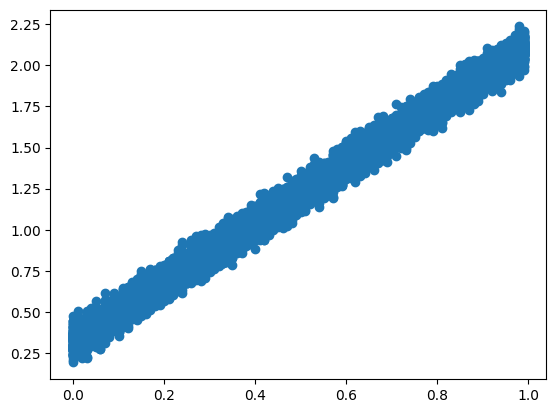

In [16]:
plt.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F)
plt.show()

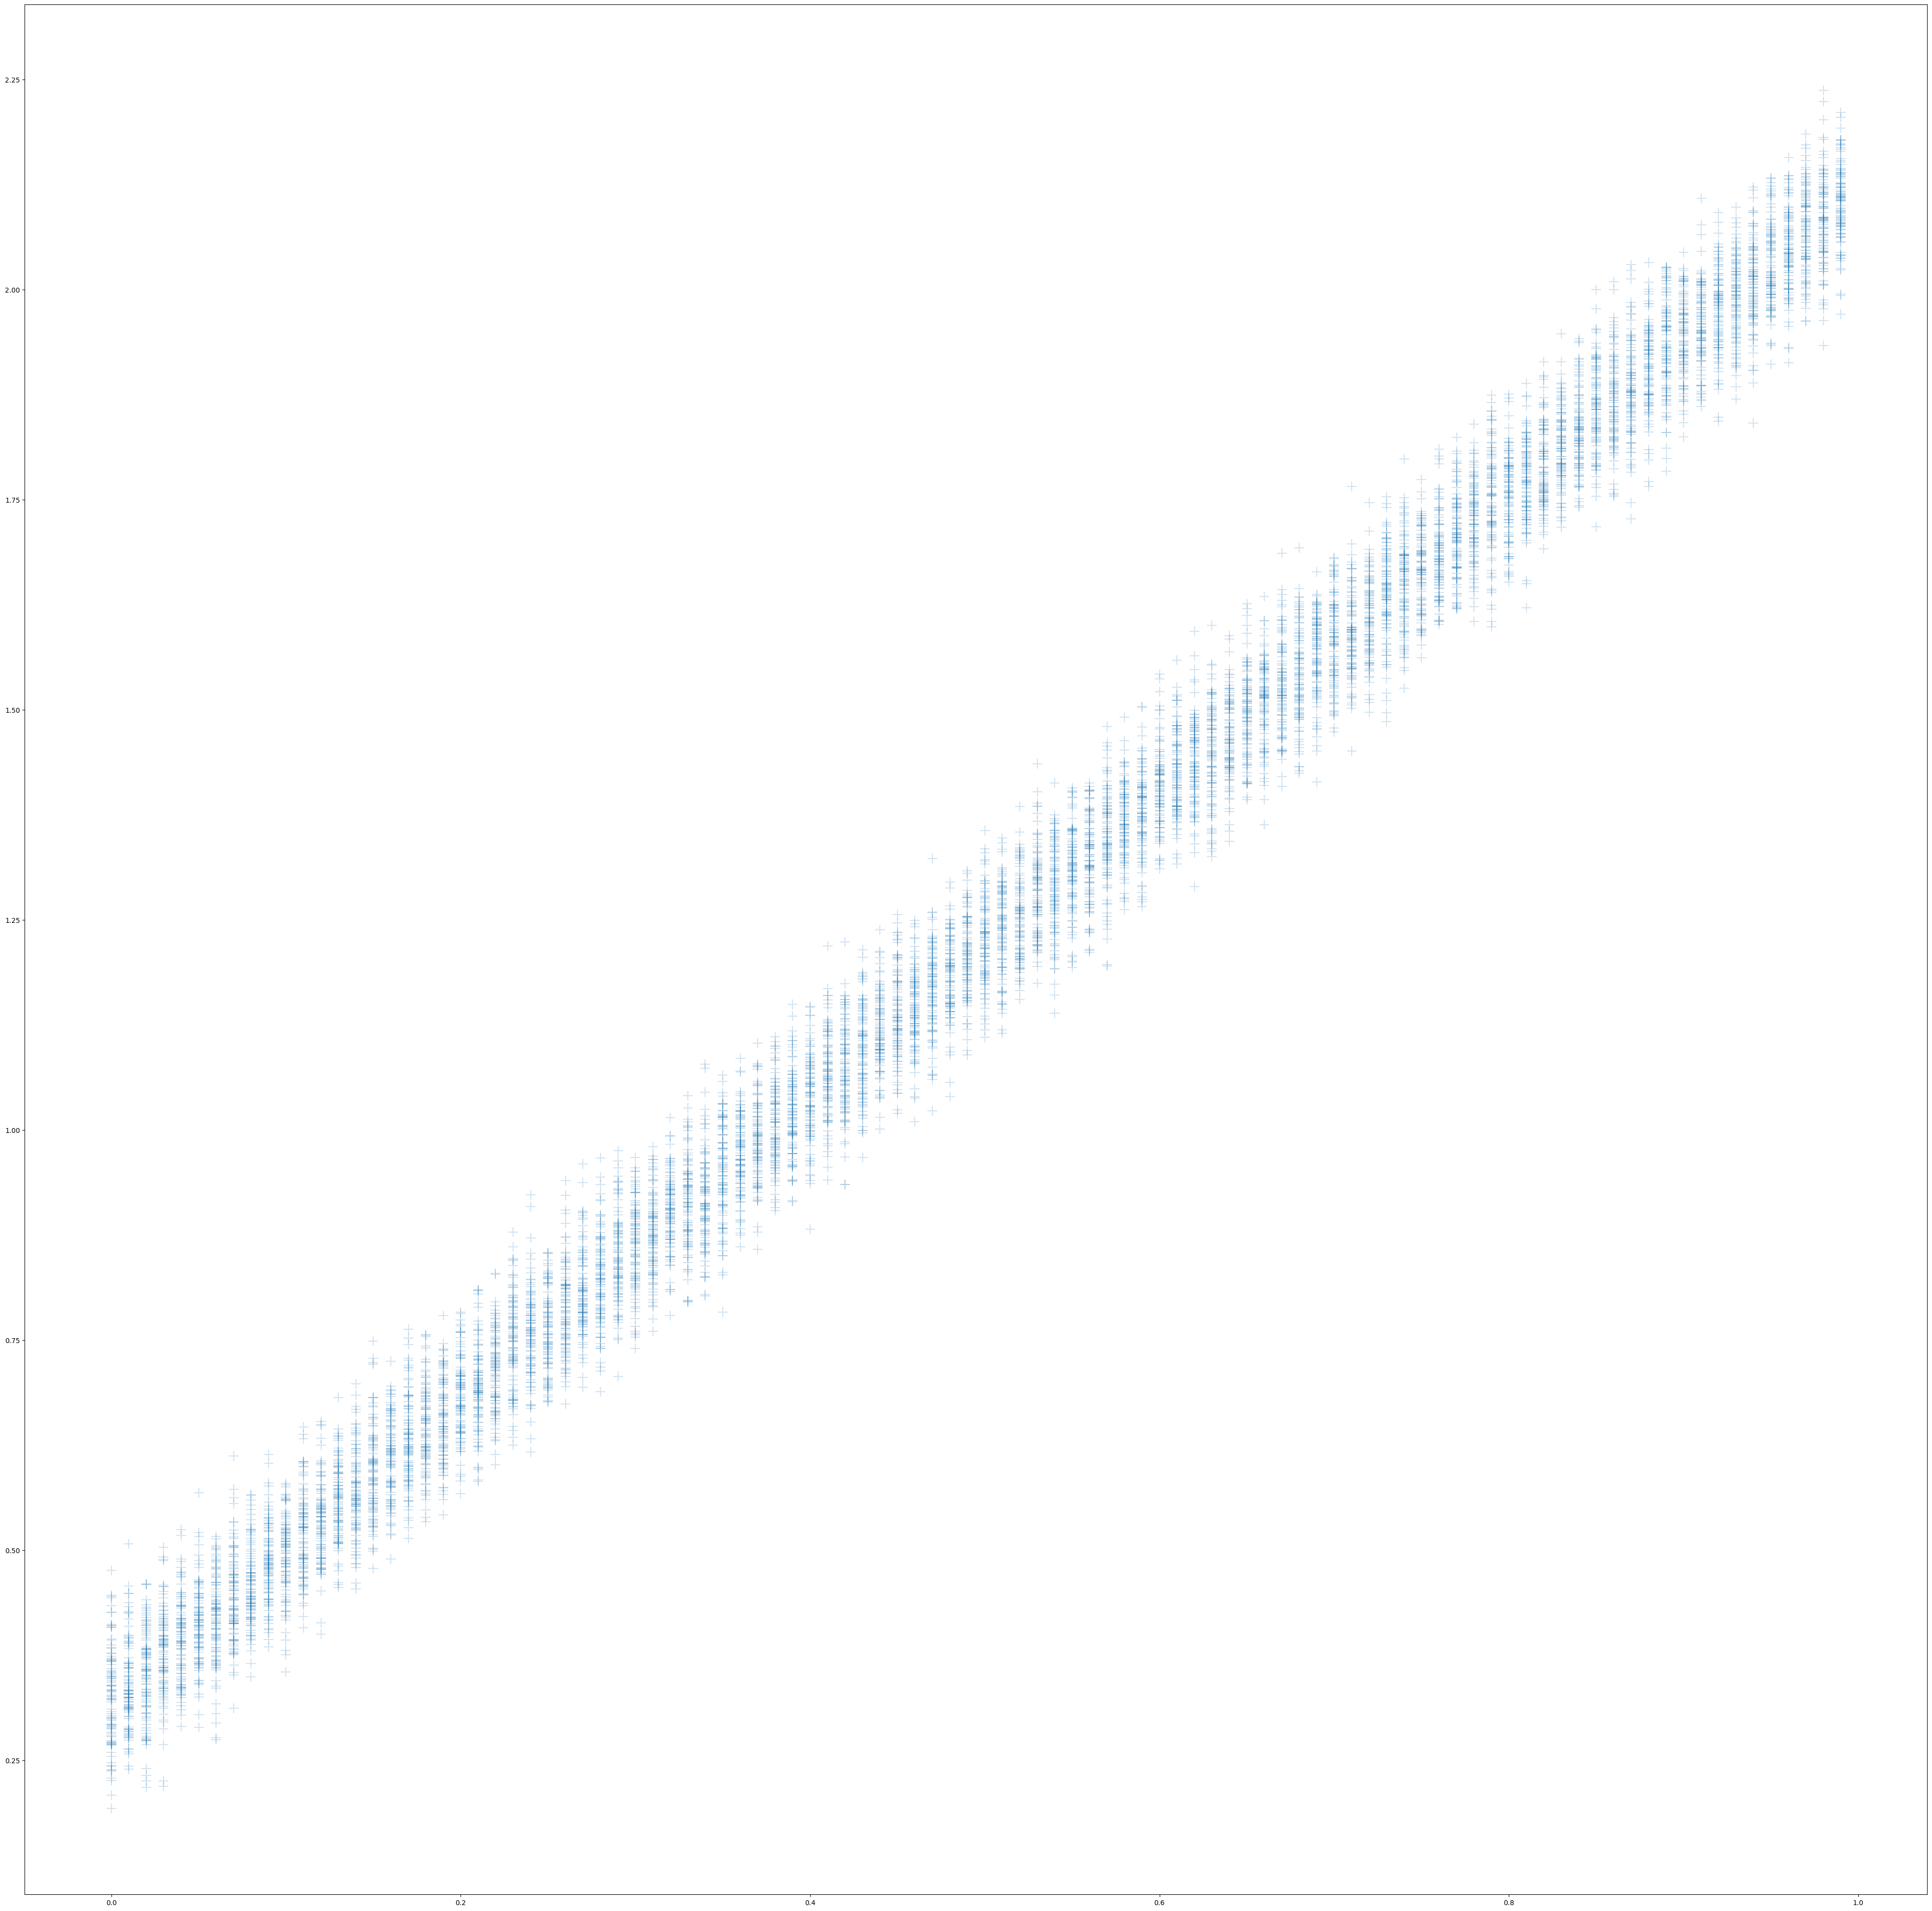

In [17]:
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(111)
ax.scatter(x=noised_scaled_data_C, y=noised_scaled_data_F , alpha=0.2, s=200, marker='+')
plt.show()

In [18]:
model2 = Sequential() #모델생성
model2.add(InputLayer(input_shape=(1,))) #2차원 데이터
model2.add(Dense(1))
model2.compile(loss='mse',optimizer='rmsprop') #모델 컴파일
model2.summary() #모델 구조 확인

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model2.predict([0.01]) #모델 예측

1/1 [==============================] - 0s 62ms/step


array([[-0.00781054]], dtype=float32)

In [20]:
fit_hist = model2.fit(noised_scaled_data_C,noised_scaled_data_F, epochs=20) #20번 데이터넣어 학습

Epoch 1/20
313/313 [==============================] - 1s 1ms/step - loss: 2.3429
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 1.1948
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.4918
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2035
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1293
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0150
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 12/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 13/20
313/313 [====

In [21]:
model2.save('noised_after_leaning.h5') #모델 저장

In [22]:
print(model2.predict([0.01])) #학습후 예측

1/1 [==============================] - 0s 41ms/step
[[0.3394361]]


In [23]:
celsius_value = int(input('섭씨 온도를 입력하세요.'))
print('화씨온도로',np.around(model2.predict([celsius_value / 100]) *100,1),'입니다')

섭씨 온도를 입력하세요. 32


1/1 [==============================] - 0s 36ms/step
화씨온도로 [[89.7]] 입니다


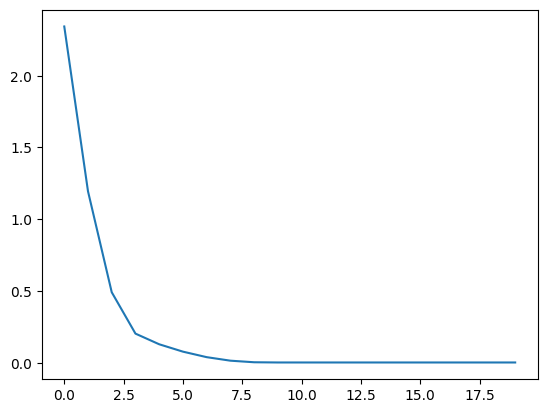

In [24]:
plt.plot(fit_hist.history['loss'])
plt.show()